# API Test WatsonX Medical
In thise notebook just we will test our api to make queries to our server api
that has running the backend app of the container. 

In [22]:
from gradio_client import Client
import json
import requests
def test_api_connection(api_url):
    try:
        response = requests.get(api_url, timeout=5)
        if response.status_code == 200:
            return True
    except requests.exceptions.RequestException:
        pass
    return False

In [23]:
REMOTE_API = "https://watsonx-medical.16jc1w8uq8wb.us-south.codeengine.appdomain.cloud/"
LOCAL_API = "http://127.0.0.1:7860/"
api_to_connect = None
if test_api_connection(REMOTE_API):
    api_to_connect = REMOTE_API
elif test_api_connection(LOCAL_API):
    api_to_connect = LOCAL_API
else:
    print("There are no APIs to connect")

if api_to_connect:
    print(f"Connected to API: {api_to_connect}")


Connected to API: https://watsonx-medical.16jc1w8uq8wb.us-south.codeengine.appdomain.cloud/


In [24]:
query="I have drink too much alcohol and I have headache what should do"

In [25]:
client = Client(api_to_connect)
result = client.predict(
		query,	# str  in 'message' Textbox component
		api_name="/predict"
)

Loaded as API: https://watsonx-medical.16jc1w8uq8wb.us-south.codeengine.appdomain.cloud/ ✔


In [26]:
# Read the JSON file
with open(result, 'r') as f:
    data = json.load(f)
# Convert the list to a dictionary
data_dict = {"user": data[0][0], "ai": data[0][1]}
# Print the content of the dictionary
output_json=json.dumps(data_dict, indent=2)
print(output_json)
  

{
  "user": "I have drink too much alcohol and I have headache what should do",
  "ai": "If you've had too much alcohol and are experiencing a headache, it's important to drink plenty of water and rest. Over-the-counter pain relievers can also help alleviate the pain. However, if your headache persists or worsens, or if you experience any other symptoms such as chest pain, difficulty breathing, or nausea, seek immediate medical attention."
}


In [27]:
client = Client(api_to_connect)
def askme_api(query,client):
    result = client.predict(
            query,	# str  in 'message' Textbox component
            api_name="/predict"
    )
    # Read the JSON file
    with open(result, 'r') as f:
        data = json.load(f)
    # Convert the list to a dictionary
    data_dict = {"user": data[0][0], "ai": data[0][1]}
    # Print the content of the dictionary
    output_json=json.dumps(data_dict, indent=2)
    print(output_json)    

Loaded as API: https://watsonx-medical.16jc1w8uq8wb.us-south.codeengine.appdomain.cloud/ ✔


In [28]:
askme_api(query,client)

{
  "user": "I have drink too much alcohol and I have headache what should do",
  "ai": "If you've had too much alcohol and are experiencing a headache, it's important to drink plenty of water and rest. Over-the-counter pain relievers can also help alleviate the pain. However, if your headache persists or worsens, or if you experience any other symptoms such as chest pain, difficulty breathing, or nausea, seek immediate medical attention."
}


In [29]:
questions=["I have headache due to I drink too much alcohol what should do?",
           "I have acne. Can I use Pantoprazole with Cutein?",
           "My baby has diarrhea  yellow for 2 days , it has 14 months what should I do?"]

In [30]:
import time
times = []
for question in questions:
    start_time = time.time()
    askme_api(question,client)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    # Print the elapsed time with 2 digits after the seconds
    print("Runtime:", "{:.2f}".format(elapsed_time), "seconds")
    print()


{
  "user": "I have drink too much alcohol and I have headache what should do",
  "ai": "If you've had too much alcohol and are experiencing a headache, it's important to drink plenty of water and rest. Over-the-counter pain relievers can also help alleviate the pain. However, if your headache persists or worsens, or if you experience any other symptoms such as chest pain, difficulty breathing, or nausea, seek immediate medical attention."
}
Runtime: 2.35 seconds

{
  "user": "I have drink too much alcohol and I have headache what should do",
  "ai": "If you've had too much alcohol and are experiencing a headache, it's important to drink plenty of water and rest. Over-the-counter pain relievers can also help alleviate the pain. However, if your headache persists or worsens, or if you experience any other symptoms such as chest pain, difficulty breathing, or nausea, seek immediate medical attention."
}
Runtime: 3.12 seconds

{
  "user": "I have drink too much alcohol and I have headache

## Comparison Remote vs Local

In [32]:
REMOTE_API = "https://watsonx-medical.16jc1w8uq8wb.us-south.codeengine.appdomain.cloud/"
LOCAL_API = "http://127.0.0.1:7860/"
api_to_connect = None
if test_api_connection(REMOTE_API) and test_api_connection(LOCAL_API):
    api_to_connect_remote = REMOTE_API
    client_remote = Client(api_to_connect_remote)
    api_to_connect_local = LOCAL_API
    client_local = Client(api_to_connect_local)
    do_test=True
else:
    print("There are no APIs to connect")
    do_test=False

questions=["I have headache due to I drink too much alcohol what should do?",
           "I have acne. Can I use Pantoprazole with Cutein?",
           "My baby has diarrhea  yellow for 2 days , it has 14 months what should I do?"]
import time

times_remote = []
times_local = []
for question in questions:
    start_time = time.time()
    askme_api(question,client_remote)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_remote.append(elapsed_time)
    # Print the elapsed time with 2 digits after the seconds
    print("Runtime Remote:", "{:.2f}".format(elapsed_time), "seconds")
    print()

    start_time = time.time()
    askme_api(question,client_local)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_local.append(elapsed_time)
    # Print the elapsed time with 2 digits after the seconds
    print("Runtime Local:", "{:.2f}".format(elapsed_time), "seconds")
    print()


Loaded as API: https://watsonx-medical.16jc1w8uq8wb.us-south.codeengine.appdomain.cloud/ ✔
Loaded as API: http://127.0.0.1:7860/ ✔
{
  "user": "I have headache due to I drink too much alcohol what should do?",
  "ai": "If you're experiencing a headache due to alcohol consumption, try avoiding further alcohol intake and staying hydrated. Over-the-counter pain relievers can also help alleviate the symptoms. However, if your headache persists or worsens, it's essential to consult a healthcare professional for a proper evaluation."
}
Runtime Remote: 2.63 seconds

{
  "user": "I have headache due to I drink too much alcohol what should do?",
  "ai": "If you're experiencing a headache due to alcohol consumption, try avoiding further alcohol intake and staying hydrated. Over-the-counter pain relievers can also help alleviate the symptoms. However, if your headache persists or worsens, it's essential to consult a healthcare professional for a proper evaluation."
}
Runtime Local: 3.09 seconds



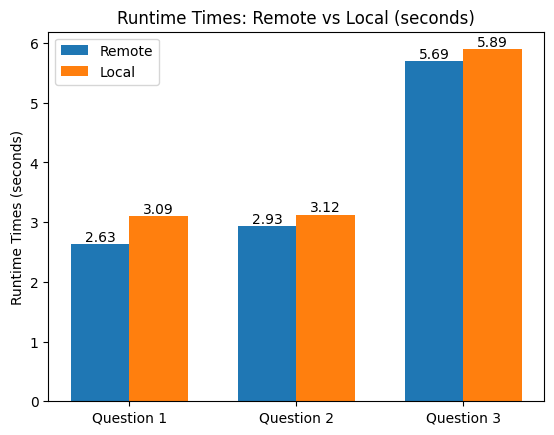

In [40]:
import numpy as np
import matplotlib.pyplot as plt
def plot_times_comparison(times_remote, times_local):
    index = np.arange(len(times_remote))
    bar_width = 0.35

    fig, ax = plt.subplots()
    remote_bars = ax.bar(index, times_remote, bar_width, label="Remote")
    local_bars = ax.bar(index + bar_width, times_local, bar_width, label="Local")

    # Function to add text labels below each bar
    def add_labels(bars, ax):
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), "{:.2f}".format(bar.get_height()), ha="center", va="bottom")

    add_labels(remote_bars, ax)
    add_labels(local_bars, ax)

    #ax.set_xlabel("Index")
    ax.set_ylabel("Runtime Times (seconds)")
    ax.set_title("Runtime Times: Remote vs Local (seconds)")
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([f"Question {i + 1}" for i in index])
    ax.legend()

    plt.show()

plot_times_comparison(times_remote, times_local)